In [23]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split


uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)

labels = {
    "mileage_per_year":"milhas_por_ano",
    "model_year":"ano_modelo",
    "price":"preco",
    "sold":"vendido"
}
dados = dados.rename(columns=labels)
dados["vendido"] = dados["vendido"].map({"yes":1,"no":0})
ano_atual = datetime.today().year
dados["idade_modelo"] = ano_atual - dados.ano_modelo 
dados["km_ano"] = dados.milhas_por_ano * 1.60934
dados = dados.drop(columns = ["Unnamed: 0","milhas_por_ano", "ano_modelo"], axis=1)


In [24]:
dados.head()

,preco,vendido,idade_modelo,km_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [25]:
x = dados[["preco","idade_modelo","km_ano"]]
y = dados["vendido"]

In [26]:
# SEED controla a aleatoriedade da separação dos dados
# stratify diz que o algoritmo deve estratificar a amostra com base na classificação (Y)
SEED = 5
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.25, stratify = y)
# Treinando o modelo
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
model = LinearSVC()
model.fit(train_x, train_y)

previsoes = model.predict(test_x)
accuracy_score(test_y, previsoes)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.628

In [27]:
from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier()
dummy_stratified.fit(train_x, train_y)
dummy_stratified.score(test_x, test_y)

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


0.5244

In [28]:
dummy_most_frequent = DummyClassifier(strategy="most_frequent")
dummy_most_frequent.fit(train_x, train_y)
dummy_stratified.score(test_x, test_y)

0.5068

In [29]:
# SEED controla a aleatoriedade da separação dos dados
# stratify diz que o algoritmo deve estratificar a amostra com base na classificação (Y)
SEED = 5
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x,y, test_size = 0.25, stratify = y)
# Treinando o modelo
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(raw_train_x) # treina
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC()
model.fit(train_x, train_y)

previsoes = model.predict(test_x)
accuracy_score(test_y, previsoes)

0.7748

In [36]:
# SEED controla a aleatoriedade da separação dos dados
# stratify diz que o algoritmo deve estratificar a amostra com base na classificação (Y)
SEED = 5
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x,y, test_size = 0.25, stratify = y)
# Treinando o modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(raw_train_x) # treina
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = DecisionTreeClassifier(max_depth=2)
model.fit(train_x, train_y)

previsoes = model.predict(test_x)
accuracy_score(test_y, previsoes)

0.7684

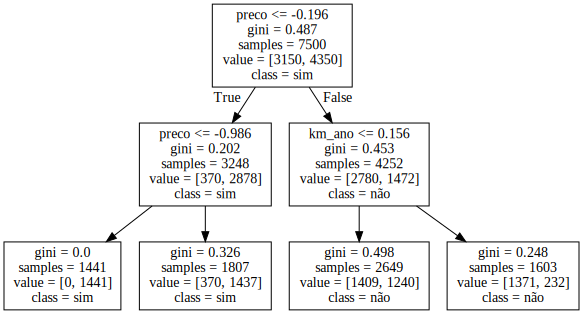

In [39]:
!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names=features, class_names=["não","sim"])
grafico  = graphviz.Source(dot_data)
grafico

In [ ]:
The 